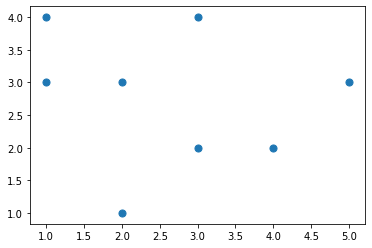

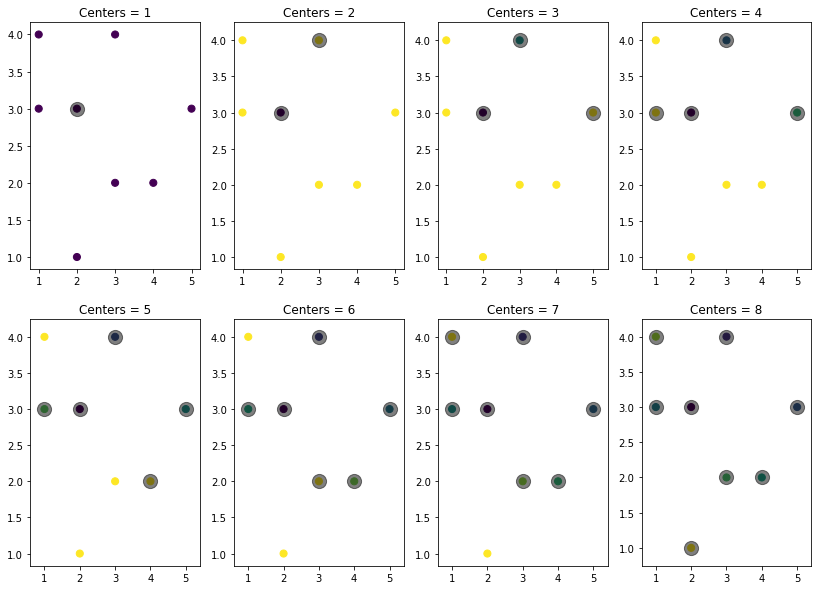

In [113]:
import numpy as np
import matplotlib.pyplot as plt

#Кол-во кластеров
number_of_clusters = 3

X = np.zeros((8, 2)) 
##############################
#### Точки сюда ставь ########
##############################
X[0] = [2, 3] 
X[1] = [3, 4] 
X[2] = [5, 3] 
X[3] = [1, 3] 
X[4] = [4, 2] 
X[5] = [3, 2] 
X[6] = [1, 4]
X[7] = [2, 1] 

##############################
## Больше ничего не трогай ###
##############################

plt.scatter(X[:, 0], X[:, 1], s=50);

from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
fig, axs = plt.subplots(2, 4,figsize=(14, 10))
from sklearn.cluster import KMeans

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']


y_means = np.zeros(len(X))

for ncenters, ax in enumerate(axs.reshape(-1), 1):
    initial_medoids = [i for i in range(ncenters)]
    kmedoids_instance = kmedoids(X, initial_medoids)
    # Run cluster analysis and obtain results.
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    # Show allocated clusters.
    medoids = kmedoids_instance.get_medoids()
    for i in range(len(clusters)):
        for j in range(len(clusters[i])):
            x_index = clusters[i][j]
            y_means[x_index] = i
    # Нарисовали точки по кластерам
    ax.set_title('Centers = {0}'.format(ncenters))
    ax.scatter(X[:, 0], X[:, 1], c=y_means , s=50, cmap='viridis')
    
    centers = []
    for i in range(len(medoids)):
        centers.append([X[i][0], X[i][1]]) 
    centers = np.array(centers)
    a = kmedoids_instance.get_cluster_encoding()
    closest_clusters = kmedoids_instance.predict(centers)
    #Отрисвока центров кластера
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Display clusters.
#visualizer = cluster_visualizer()
#visualizer.append_clusters(clusters, X)
#visualizer.show()

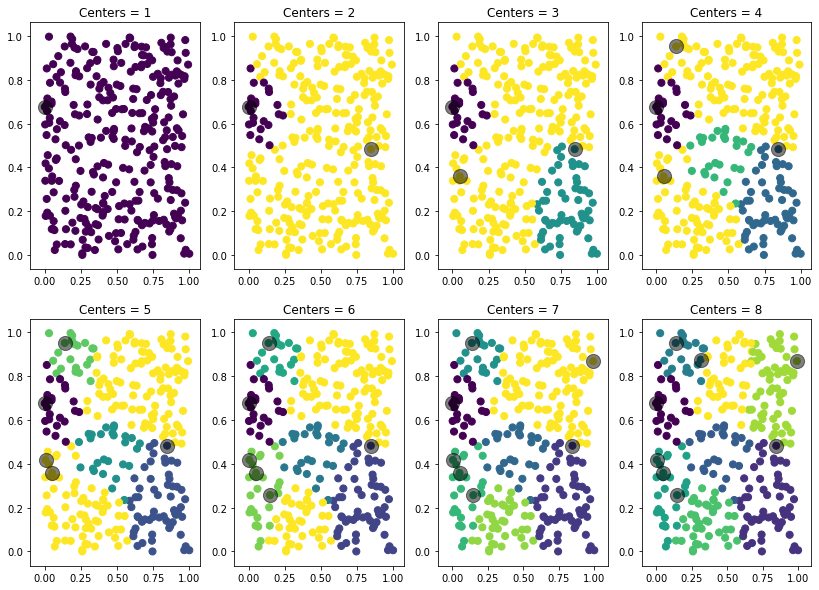

In [114]:
xpts = np.zeros(1)
ypts = np.zeros(1)
for i in range(30):
    xpts = np.hstack((xpts, np.random.random_sample(10)))
    ypts = np.hstack((ypts, np.random.random_sample(10)))

# Трансиормируем в массив координат
X = np.vstack((xpts,ypts))
X = X.reshape(len(xpts), 2)
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
fig, axs = plt.subplots(2, 4,figsize=(14, 10))
from sklearn.cluster import KMeans

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']


y_means = np.zeros(len(X))

#print(y_means)

for ncenters, ax in enumerate(axs.reshape(-1), 1):
    initial_medoids = [i for i in range(ncenters)]
    kmedoids_instance = kmedoids(X, initial_medoids)
    # Run cluster analysis and obtain results.
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    # Show allocated clusters.
    medoids = kmedoids_instance.get_medoids()

    for i in range(len(clusters)):
        for j in range(len(clusters[i])):
            x_index = clusters[i][j]
            y_means[x_index] = i
    
    # Нарисовали точки по кластерам
    ax.set_title('Centers = {0}'.format(ncenters))
    ax.scatter(X[:, 0], X[:, 1], c=y_means , s=50, cmap='viridis')
    
    centers = []
    for i in range(len(medoids)):
        centers.append([X[i][0], X[i][1]]) 
    centers = np.array(centers)
    #Отрисвока центров кластера
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


# Display clusters.
#visualizer = cluster_visualizer()
#visualizer.append_clusters(clusters, X)
#visualizer.show()